In [144]:
import os
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import keras

In [145]:
img_path = r'C:\Users\User\Desktop\sophomore_2nd_semester\Artificial_Intelligence\final_project\Human-pose-estimation\dataset\test_data\lie\20230603_182737(0).jpg'

In [146]:
import utils
from data import BodyPart
from movenet import Movenet
movenet = Movenet('movenet_thunder')
def detect(input_tensor, inference_count=3):
  """Runs detection on an input image.
 
  Args:
    input_tensor: A [height, width, 3] Tensor of type tf.float32.
      Note that height and width can be anything since the image will be
      immediately resized according to the needs of the model within this
      function.
    inference_count: Number of times the model should run repeatly on the
      same input image to improve detection accuracy.
 
  Returns:
    A Person entity detected by the MoveNet.SinglePose.
  """
  image_height, image_width, channel = input_tensor.shape
 
  # Detect pose using the full input image
  movenet.detect(input_tensor.numpy(), reset_crop_region=True)
 
  # Repeatedly using previous detection result to identify the region of
  # interest and only croping that region to improve detection accuracy
  for _ in range(inference_count - 1):
    person = movenet.detect(input_tensor.numpy(), 
                            reset_crop_region=False)
    # person.
  return person

In [147]:

image = tf.io.read_file(img_path)
image = tf.io.decode_jpeg(image)
person = detect(image)

pose_landmarks = np.array([[keypoint.coordinate.x, keypoint.coordinate.y, keypoint.score]
    for keypoint in person.keypoints])
coordinates = pose_landmarks.flatten().astype(float).tolist()

In [148]:

CNN_model = keras.models.load_model('CNN.best.hdf5')
DNN_model = keras.models.load_model('DNN.best.hdf5')



In [149]:
model = CNN_model

In [150]:
poses = ['cross_leg', 'cross_one', 'hunch', 'lie', 'straight']

In [151]:
#@title Functions to visualize the pose estimation results.

def draw_prediction_on_image(
    image, person, crop_region=None, close_figure=True,
    keep_input_size=False):
  """Draws the keypoint predictions on image.
 
  Args:
    image: An numpy array with shape [height, width, channel] representing the
      pixel values of the input image.
    person: A person entity returned from the MoveNet.SinglePose model.
    close_figure: Whether to close the plt figure after the function returns.
    keep_input_size: Whether to keep the size of the input image.
 
  Returns:
    An numpy array with shape [out_height, out_width, channel] representing the
    image overlaid with keypoint predictions.
  """
  # Draw the detection result on top of the image.
  image_np = utils.visualize(image, [person])
  
  # Plot the image with detection results.
  height, width, channel = image.shape
  aspect_ratio = float(width) / height
  fig, ax = plt.subplots(figsize=(12 * aspect_ratio, 12))
  im = ax.imshow(image_np)
 
  if close_figure:
    plt.close(fig)
 
  if not keep_input_size:
    image_np = utils.keep_aspect_ratio_resizer(image_np, (512, 512))

  return image_np

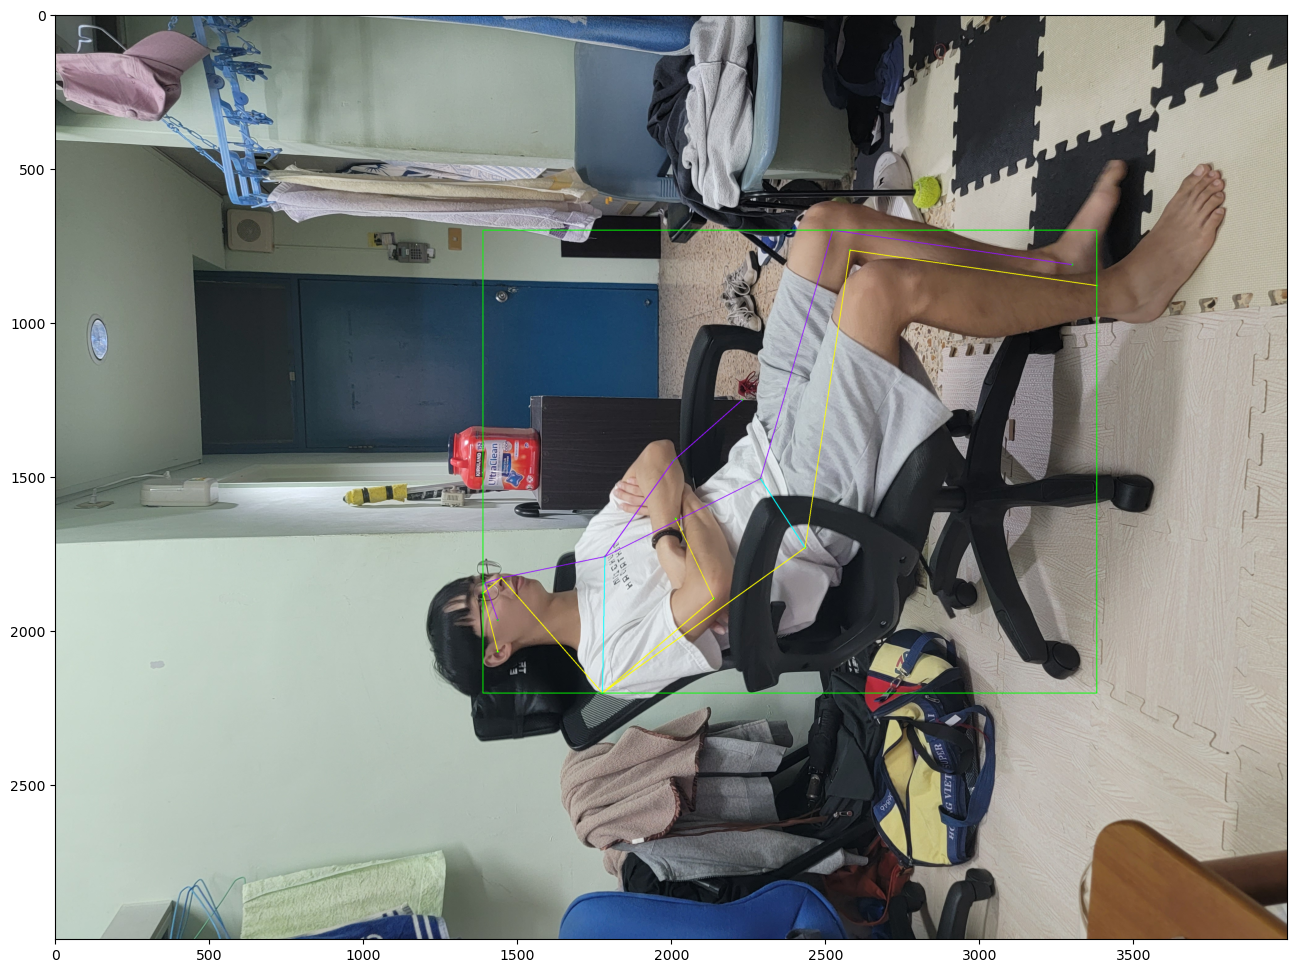

In [152]:

_ = draw_prediction_on_image(image.numpy(), person, crop_region=None, 
                           close_figure=False, keep_input_size=True)

In [153]:
pred = model.predict([coordinates])
print("The probability of five poses:")
for index, pose in enumerate(poses):
    print(pose+": " + str(pred[0][index]))
print("The predict pose: " + poses[np.array(pred).argmax()])

1/1 [==============================] - 1s 616ms/step
The probability of five poses:
cross_leg: 1.7359012e-07
cross_one: 1.9202313e-05
hunch: 8.464188e-05
lie: 0.9998679
straight: 2.7987468e-05
The predict pose: lie
